In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Discrete data

In [2]:
df_train = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\3labels\processed_train.csv')

In [3]:
# Create dict to convert rate to measure
measures_dict = {
    "BMI": { # kg/m^2
        "both":{
            "1": 18.4, # <18.4
            "2": 24.9, # 18.4 <= x < 24.9
            "3": 30, # 24.9 <= x < 30
            "4": 30 # >= 30
        }
    },

    "WaistCircumference": {  # cm
        "male":{
            "1": 94, # <94
            "2": 102, # 94 <= x < 102
            "3": 102, # >= 102
        }, 
        "female": {
            "1": 80, # <80
            "2": 88, # 80 <= x < 88
            "3": 88 # >= 88
        }
    },

    "HDLCholesterol": { # mg/dl
        "both":{
            "1": 40, # <40 
            "2": 60, # 40 <= x < 60
            "3": 60 # >= 60
        }  
    },

    "Triglycerides":{ # mg/dl
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }
    },

    "LDLCholesterol": { # mg/dl
        "both":{
            "1": 100, # <100
            "2": 160, # 100 <= x < 160
            "3": 160 # >= 160
        }
    },

    "Hba1c": { # %
        "both":{
            "1": 5.7, # <5.7
            "2": 6.5, # 5.7 <= x < 6.5
            "3": 6.5 # >= 6.5
        }
    },

    "ALT": { # U/L
        "male": {
            "1": 0, # <0
            "2": 41, # 0 <= x < 41
            "3": 41 # >= 41
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 31
        }
    },

    "AST": {  # U/L
        "male": {
            "1": 0, # <0
            "2": 38, # 0 <= x < 38
            "3": 38 # >= 40
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 32
        }
    },

    "AlkalinePhosphotase":{ # U/L
        "male": {
            "1": 40, # < 40
            "2": 130, # 40 <= x < 130
            "3": 130 # >= 130
        },
        "female":{
            "1": 35, # < 35
            "2": 105, # 35 <= x < 105
            "3": 105 # >= 105
        }
    },

    "Creatinine":{  # mg/dl
        "male": {
            "1": 0.67, # <0.67
            "2": 1.18, # 0.67 <= x < 1.18,
            "3": 1.18 # >= 1.18
        },
        "female":{
            "1": 0.51, # < 0.51
            "2": 0.96, # 0.51 <= x < 0.96
            "3": 0.96 # >= 0.96
        }
    },
    
    "UricAcid": { # mng/dl
        "male": {
            "1": 3.4, # <3.4
            "2": 7.1, # 3.4 <= x < 7.1
            "3": 7.1 # >= 7.1
        }, 

        "female": {
            "1": 2.4, # < 2.4
            "2": 5.8, # 2.4 <= x < 5.8
            "3": 5.8 # >= 5.8
        }
    }
}

In [4]:
col_blood_dict = {
    "Hemoglobin": {
        "min": 10.7,
        "max": 17.1
    },
    "Hematocrit": {
        "min": 32.1,
        "max": 50.9
    },
    "MeanCellVolumn": {
        "min": 68.2,
        "max": 102.7
    },
    "MeanCellHemoglobin": {
        "min": 22.3,
        "max": 35
    },
    "RedCellDistributionWidth": {
        "min": 11.4,
        "max": 16.2
    },
    "PlateletCount": {
        "min": 155,
        "max": 547
    },
    "MeanPlateletVolume": {
        "min": 6.1,
        "max": 10.2
    }
}

In [5]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'label', 'YearStart',
       'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [60]:
def classify_blood_value(value, test_name):
    if pd.isnull(value):
        return None
    thresholds = col_blood_dict[test_name]
    if value < thresholds["min"]:
        return 1  # Low
    elif value > thresholds["max"]:
        return 3  # High
    else:
        return 2  # Normal

In [61]:
# Apply classification for each test in col_blood_dict
for test_name in col_blood_dict:
    if test_name in df_train.columns:
        df_train[f"{test_name}_class"] = df_train[test_name].apply(lambda x: classify_blood_value(x, test_name))

In [62]:
import pandas as pd

# Your DataFrame should include a 'gender' column and measurement columns matching the keys in measures_dict
# For example:
# df = pd.read_csv("your_data.csv")

def get_class(value, measure, gender):
    if pd.isnull(value):
        return None

    # Determine whether to use gender-specific or 'both' thresholds
    thresholds = None
    if gender in measures_dict[measure]:
        thresholds = measures_dict[measure][gender]
    elif 'both' in measures_dict[measure]:
        thresholds = measures_dict[measure]['both']
    else:
        return None

    # Sort by threshold values (ascending)
    sorted_items = sorted(((int(k), v) for k, v in thresholds.items()), key=lambda x: x[1])

    # Handle different lengths safely (usually 3 categories, sometimes 4 like in BMI)
    for i, (label, threshold) in enumerate(sorted_items):
        if i == 0 and value < threshold:
            return label
        elif i < len(sorted_items) - 1:
            next_threshold = sorted_items[i + 1][1]
            if threshold <= value < next_threshold:
                return label
    # If value exceeds all thresholds, return the last label
    return sorted_items[-1][0]

# Apply classification for each measure
for measure in measures_dict:
    if measure in df_train.columns:
        df_train[f"{measure}_class"] = df_train.apply(
            lambda row: get_class(row[measure], measure, row['Gender']), axis=1
        )


In [63]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'label', 'YearStart',
       'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0', 'Hemoglobin_class',
       'Hematocrit_class', 'MeanCellVolumn_class', 'MeanCellHemoglobin_class',
       'RedCellDistributionWidth_class', 'PlateletCount_class',
       'MeanPlateletVolume_class', 'BMI_class', 'WaistCircumference_class',
       'HDLCholesterol_class', 'Triglycerides_class', 'LDLCholesterol_class',
       'Hba1c_class', 'ALT_class', 'AST_class', 'AlkalinePhosphotase_class',
       'Creatinine_class', 'UricAcid_class'],
      dtype='object')

In [64]:
remove_columns = {
    'Gender', 'Age', 'BMI', 'WaistCircumference', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Creatinine', 'HDLCholesterol', 'Triglycerides',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'YearStart','WaistCircumference_class', 'ALT_class', 'AST_class','UricAcid_class','AlkalinePhosphotase_class', 'Creatinine_class'
}
df_train.drop(columns=remove_columns,inplace=True)

In [65]:
df_train.columns

Index(['label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0',
       'Hemoglobin_class', 'Hematocrit_class', 'MeanCellVolumn_class',
       'MeanCellHemoglobin_class', 'RedCellDistributionWidth_class',
       'PlateletCount_class', 'MeanPlateletVolume_class', 'BMI_class',
       'HDLCholesterol_class', 'Triglycerides_class', 'LDLCholesterol_class',
       'Hba1c_class'],
      dtype='object')

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18033 entries, 0 to 18032
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           18033 non-null  float64
 1   Race_1.0                        18033 non-null  bool   
 2   Race_3.0                        18033 non-null  bool   
 3   Race_4.0                        18033 non-null  bool   
 4   Race_5.0                        18033 non-null  bool   
 5   Hemoglobin_class                18033 non-null  int64  
 6   Hematocrit_class                18033 non-null  int64  
 7   MeanCellVolumn_class            18033 non-null  int64  
 8   MeanCellHemoglobin_class        18033 non-null  int64  
 9   RedCellDistributionWidth_class  18033 non-null  int64  
 10  PlateletCount_class             18033 non-null  int64  
 11  MeanPlateletVolume_class        18033 non-null  int64  
 12  BMI_class                       

c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetric

Classification Report:

              precision    recall  f1-score   support

         0.0       0.67      0.41      0.51      1243
         1.0       0.72      0.89      0.80      2309
         2.0       0.00      0.00      0.00        55

    accuracy                           0.71      3607
   macro avg       0.46      0.43      0.44      3607
weighted avg       0.69      0.71      0.69      3607



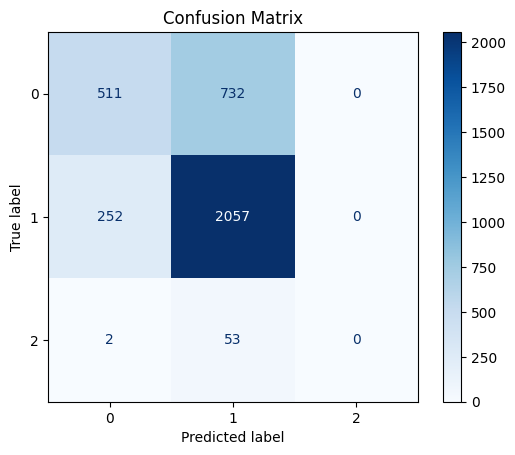

In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

df = df_train.copy()
# Prepare data
features = [col for col in df.columns if col != 'label']
X = df[features]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
